##**First import all libraries**

In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## **Read train/test data from excel file**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data=pd.read_csv('airline.csv')

In [ ]:
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


## **Data profiling**

In [ ]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
data.shape

(129880, 24)

In [ ]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## **Data Visualization**

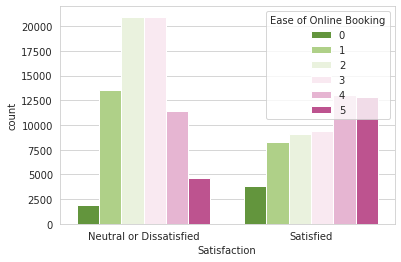

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Satisfaction',hue='Ease of Online Booking',data=data,palette='PiYG_r')

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


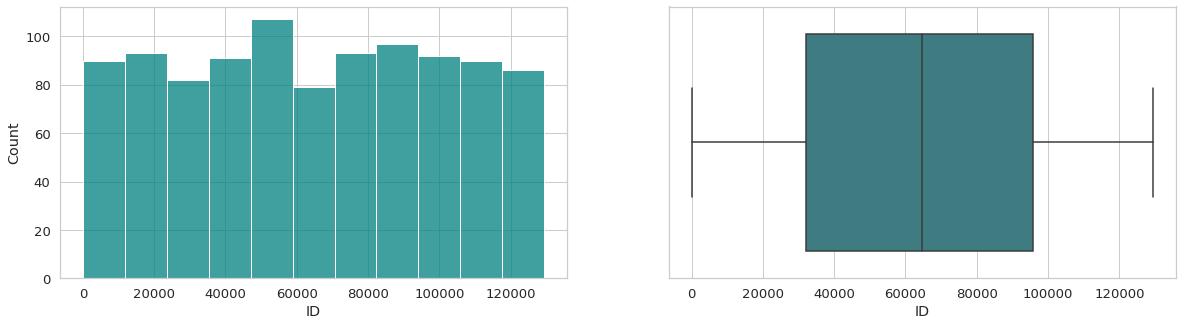

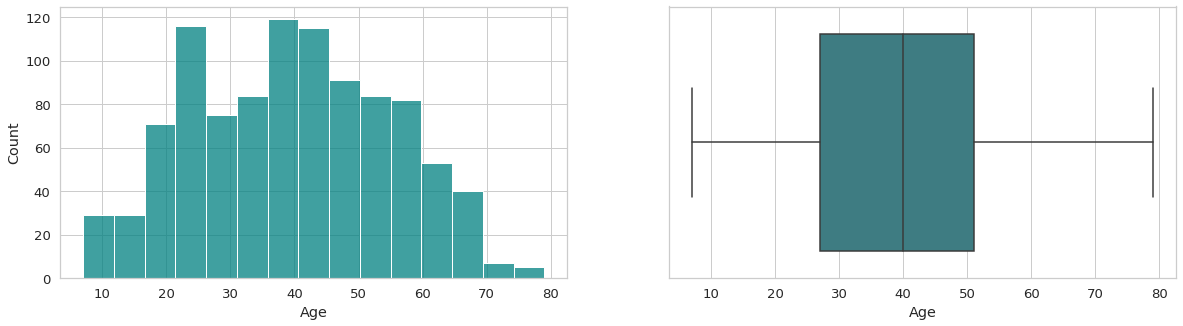

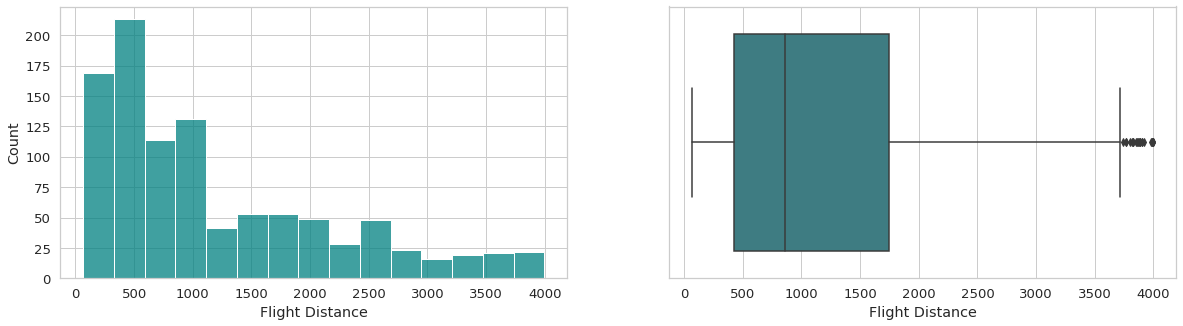

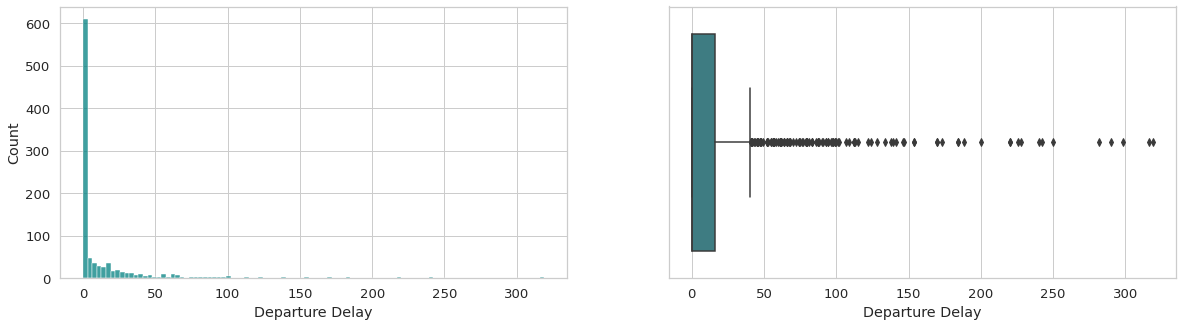

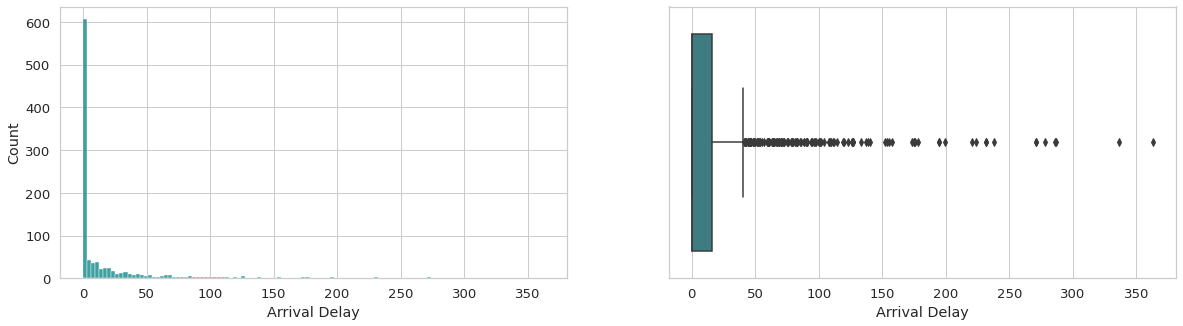

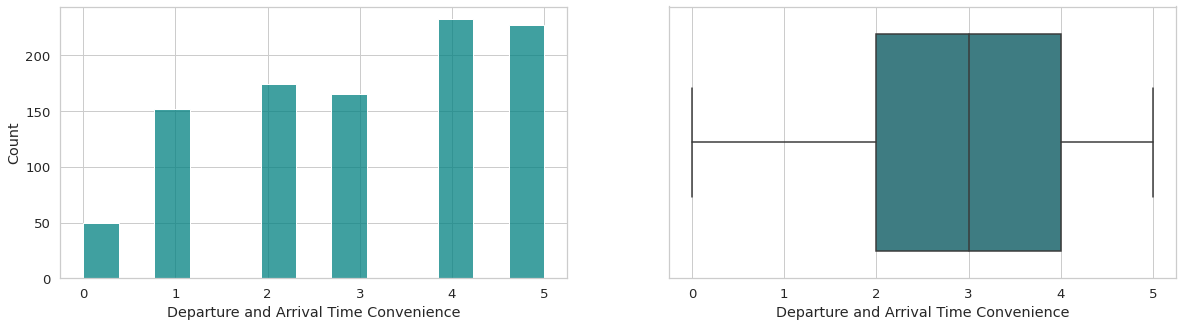

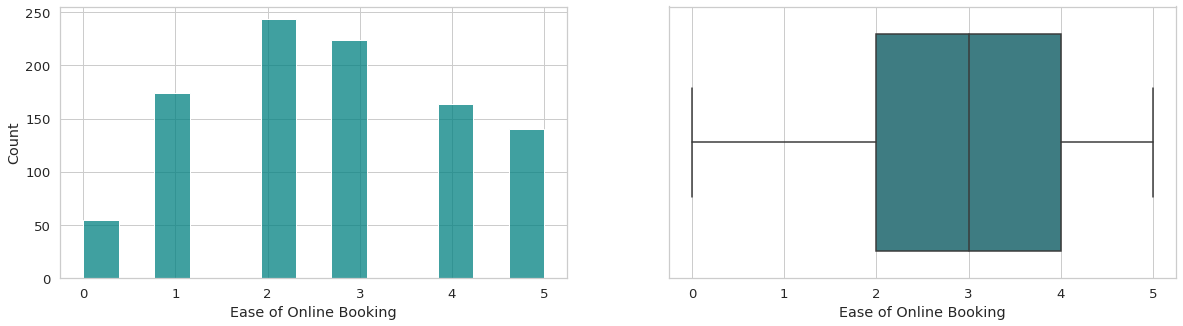

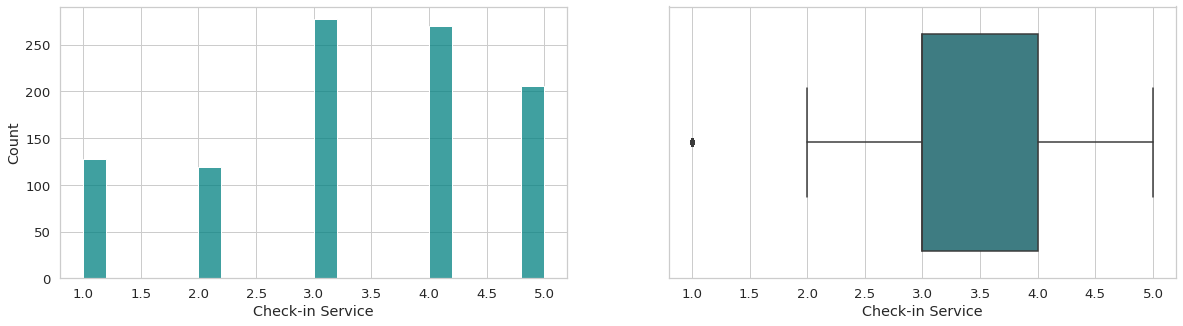

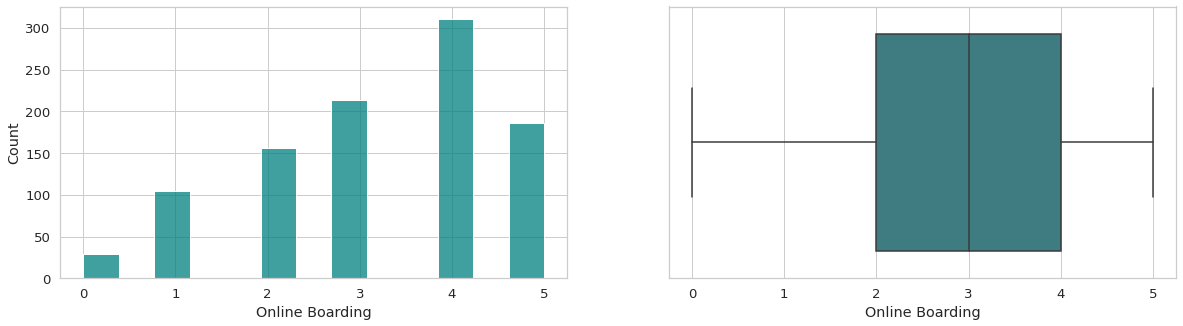

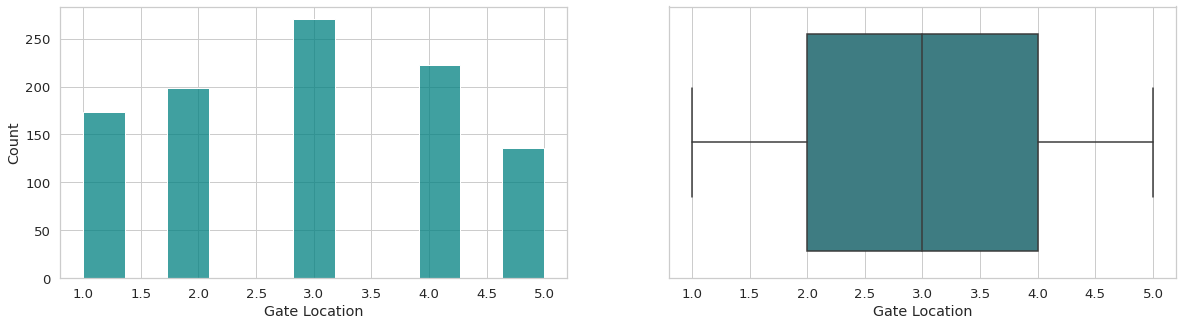

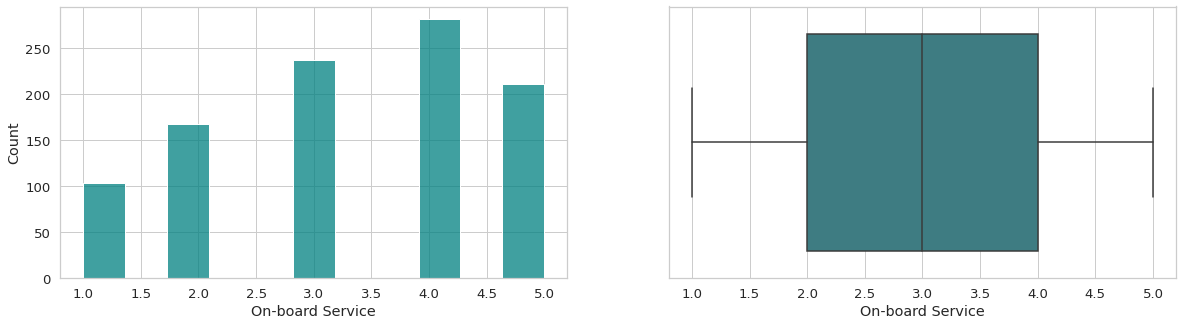

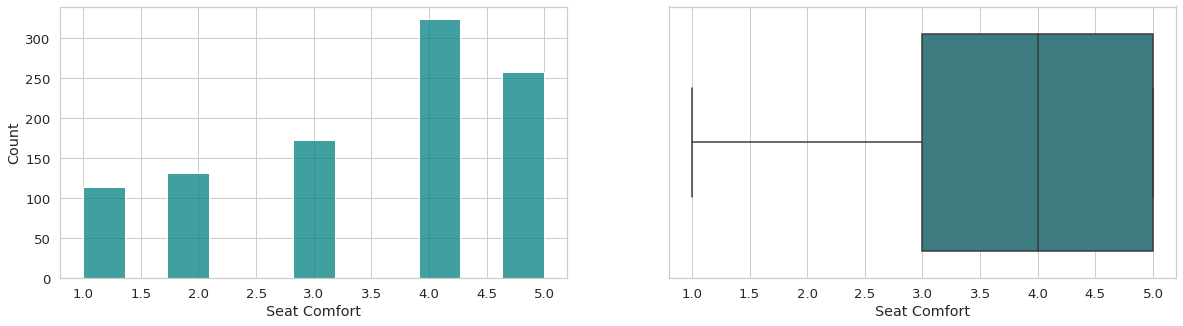

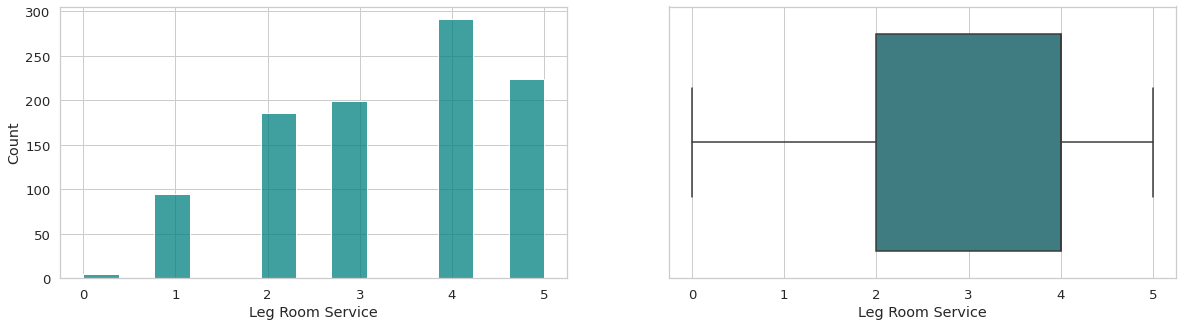

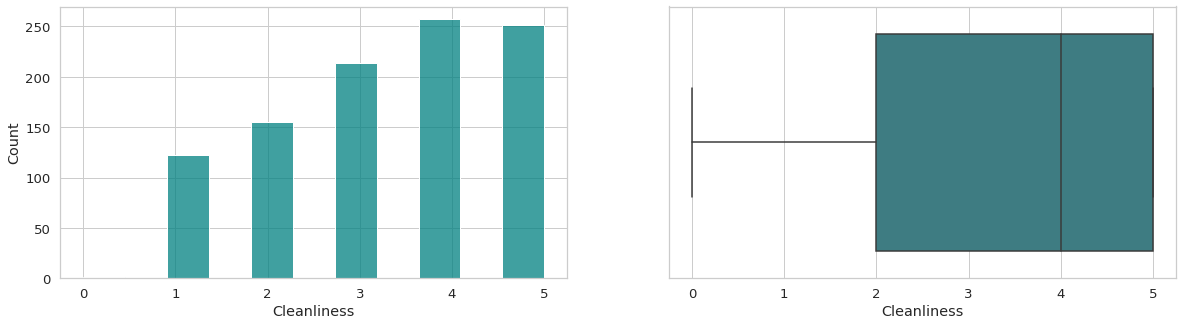

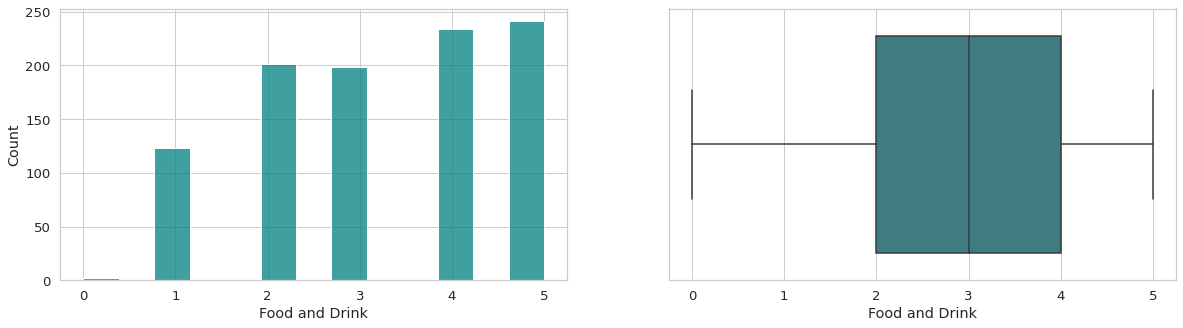

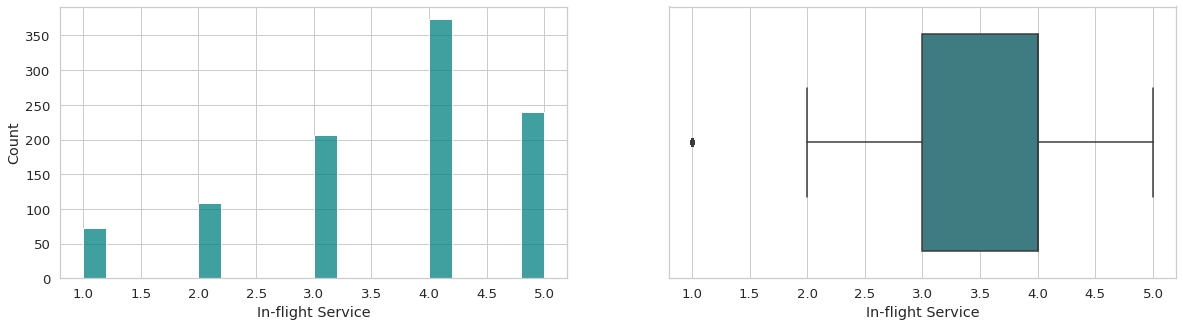

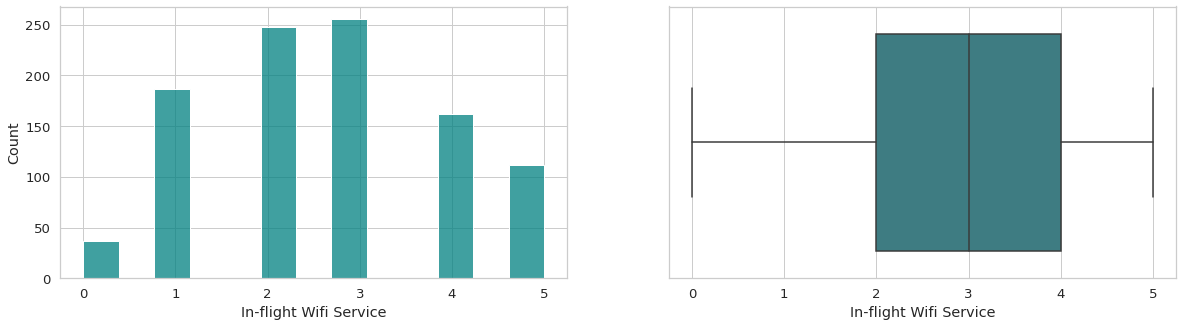

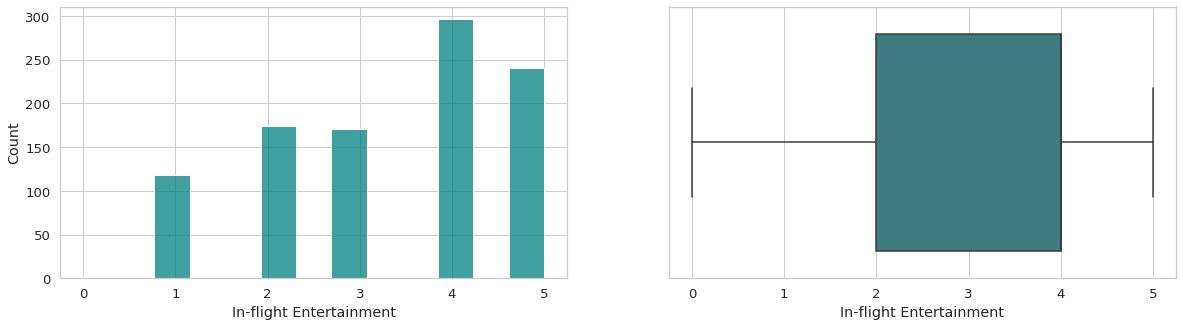

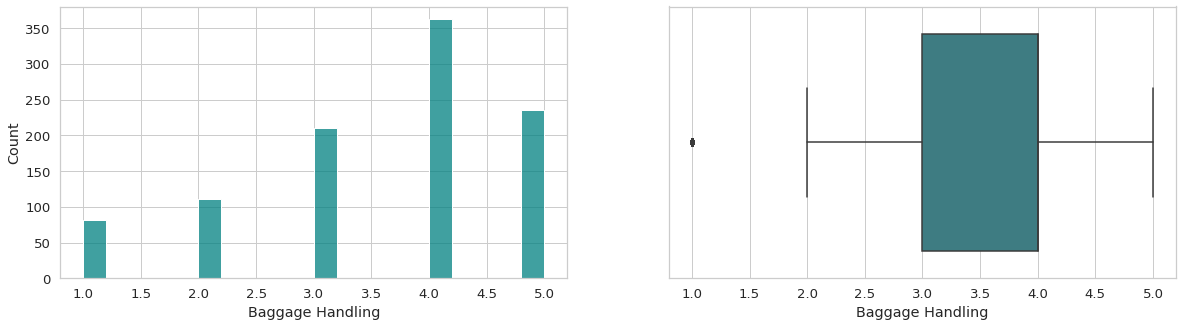

In [ ]:
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(num_columns)
sample_data = data.sample(1000)
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')


##**Data cleaning/ preprocessing**

In [ ]:
data.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [ ]:
data.dropna(axis=0, inplace=True) 

In [ ]:
data.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [ ]:
### Encoding ###
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Customer Type"] = le.fit_transform(data["Customer Type"])
data["Type of Travel"] = le.fit_transform(data["Type of Travel"])
data["Satisfaction"] = le.fit_transform(data["Satisfaction"])

### Labeling ###
data["Class"] = data["Class"].replace({"Economy":1,"Economy Plus":2,"Business":3})



```
`# This is formatted as code`
```

##**Model training**

In [ ]:
X=data[["Gender","Age","Customer Type","Type of Travel","Class","Flight Distance","Departure Delay","Arrival Delay",
        "Departure and Arrival Time Convenience","Ease of Online Booking","Check-in Service","Online Boarding",
       "Gate Location","On-board Service","Seat Comfort","Leg Room Service","Cleanliness","Food and Drink",
        "In-flight Service","In-flight Wifi Service","In-flight Entertainment","Baggage Handling"]]
y=data["Satisfaction"]
X_train, Xtest, y_train, ytest = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(Xtest)


In [ ]:
models = pd.DataFrame(columns=["Model Name","Accuracy Score"])
model_list = [("Random Forest Classifier",RandomForestClassifier(random_state=42)),
             ("Support Vector Machines",SVC(random_state=42)),
             ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42)),
             ("KNeighbors Classifier",KNeighborsClassifier(n_neighbors=2)),
             ("Gaussian Naive Bayes", GaussianNB()),
              ("Logistic Regression Classifier",LogisticRegression())
             ]

## **Model Evalution**

In [ ]:
for algoName,model in model_list:
    model.fit(X_train, y_train)
    predictions = model.predict(Xtest)
    score = accuracy_score(ytest, predictions)
    new_row = {"Model Name":algoName, "Accuracy Score":score}
    models = models.append(new_row, ignore_index=True)
models.sort_values("Accuracy Score", ascending=False)

,Model Name,Accuracy Score
0,Random Forest Classifier,0.964224
1,Support Vector Machines,0.955864
2,Decision Tree Classifier,0.945014
3,KNeighbors Classifier,0.912559
5,Logistic Regression Classifier,0.873791
4,Gaussian Naive Bayes,0.863693
